In [4]:
print('hello world')

hello world


In [57]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jan  8 15:51:19 2018
@author: sivakumar
"""

import pandas as pd
from pandas import Series 
from sklearn import linear_model
df_sales = pd.read_csv('sales data-set.csv')
df_stores = pd.read_csv('stores data-set.csv')
df_features = pd.read_csv('features data set.csv')

df_merged = df_stores.merge(df_sales, on= 'Store')
df_merged = df_merged.merge(df_features, how='left',  on=['Store','Date'])

#print(df_merged.head(1))
df_merged.to_csv('dataset_merged.csv')

#print(df_merged.describe())
#print(df_merged.dtypes)
#df_merged.Store.unique()

#print(df_merged.head())
#df_merged.insert(0,df_merged.pop(df_merged.index('Weekly_Sales')))

df_merged.insert(loc=0,column='Weekly_Sales',value = df_merged.pop('Weekly_Sales'))

logreg = linear_model.LogisticRegression(C=1e5)

Y = df_merged.Weekly_Sales
X = df_merged.iloc[:,1:]

print(X)


        Store Type    Size  Dept        Date  IsHoliday_x  Temperature  \
0           1    A  151315     1  05/02/2010        False        42.31   
1           1    A  151315     1  12/02/2010         True        38.51   
2           1    A  151315     1  19/02/2010        False        39.93   
3           1    A  151315     1  26/02/2010        False        46.63   
4           1    A  151315     1  05/03/2010        False        46.50   
5           1    A  151315     1  12/03/2010        False        57.79   
6           1    A  151315     1  19/03/2010        False        54.58   
7           1    A  151315     1  26/03/2010        False        51.45   
8           1    A  151315     1  02/04/2010        False        62.27   
9           1    A  151315     1  09/04/2010        False        65.86   
10          1    A  151315     1  16/04/2010        False        66.32   
11          1    A  151315     1  23/04/2010        False        64.84   
12          1    A  151315     1  30/0

In [65]:
X.a = X.Date
 

print(X.head())

#logreg.fit(X,Y)

   Store Type    Size  Dept        Date  IsHoliday_x  Temperature  Fuel_Price  \
0      1    A  151315     1  05/02/2010        False        42.31       2.572   
1      1    A  151315     1  12/02/2010         True        38.51       2.548   
2      1    A  151315     1  19/02/2010        False        39.93       2.514   
3      1    A  151315     1  26/02/2010        False        46.63       2.561   
4      1    A  151315     1  05/03/2010        False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  IsHoliday_y  
0         8.106        False  
1         8.106   

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model,datasets

iris = datasets.load_iris()


In [7]:
X = iris.data[:,:2]
Y = iris.target

In [8]:
X.shape

(150, 2)

In [9]:
Y.shape

(150,)

In [10]:
h = .02
logreg = linear_model.LogisticRegression(C=1e5)


In [11]:
logreg.fit(X,Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [12]:
x_min,x_max = X[:,0].min() - .5 , X[:,0].max() +0.5
y_min,y_max = X[:,1].min() - .5 , X[:,1].max() +0.5
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))

In [13]:
Z = logreg.predict(np.c_[xx.ravel(),yy.ravel()])

In [14]:
Z = Z.reshape(xx.shape)

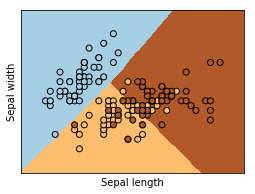

In [15]:
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()